In [6]:
%pip install matplotlib

You should consider upgrading via the '/home/gkaretka/.pyenv/versions/3.9.13/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

2023-03-02 21:37:14.291881: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-02 21:37:14.427268: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-02 21:37:14.427289: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-02 21:37:15.134303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# load dataset but select only 3s
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X_3, test_X_3 = (train_X[train_y == 3], test_X[test_y == 3])

# 6131 images, 28x28 = 784px
img_x_size = train_X_3.shape[1]
img_y_size = train_X_3.shape[2]
train_X_3.shape

(6131, 28, 28)

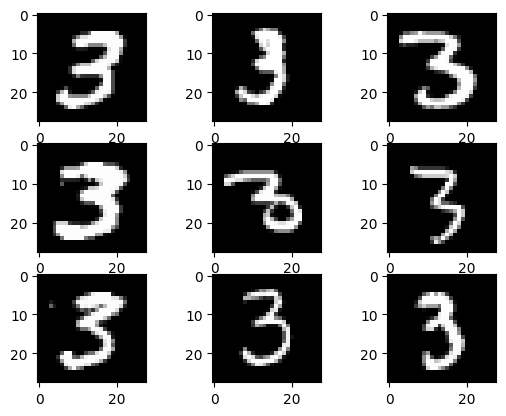

In [3]:
fig, axs = plt.subplots(nrows=3, ncols=3)
for i in range(3):
  for j in range(3):
    axs[i][j].imshow(train_X_3[i*3+j], cmap=plt.get_cmap('gray'))
plt.show()

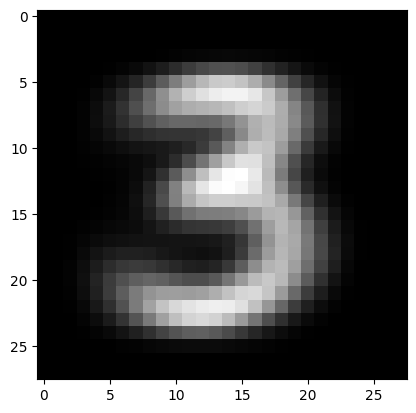

In [4]:
# get average three representation
avg_3_img = np.average(train_X_3, axis=0)
ax = plt.subplot()
ax.imshow(avg_3_img, cmap=plt.get_cmap('gray'))

In [57]:
cov_train = train_X_3.reshape(train_X_3.shape[0], img_x_size*img_y_size)
cov_matrix = np.cov(cov_train.T)
num_of_vectors_to_use = 500
num_of_vects_cols = 3
num_of_vects_row = 3

eigvals, eigvects = np.linalg.eigh(cov_matrix)

sEigvals = eigvals[::-1][0:num_of_vectors_to_use]
sEigvects = eigvects[::-1][0:num_of_vectors_to_use]
sEigvects

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.39225176e-15,  1.76733628e-14, -1.43947354e-14, ...,
        -1.81047701e-02,  8.42872225e-03, -1.50757778e-02],
       [-2.40259201e-15, -2.00256478e-14,  1.30936928e-14, ...,
        -1.07839667e-02,  5.17869282e-03, -1.13584687e-02],
       [ 3.29597460e-16,  1.27224620e-14, -4.99600361e-15, ...,
        -6.13419158e-03,  2.76925860e-03, -6.44067381e-03]])

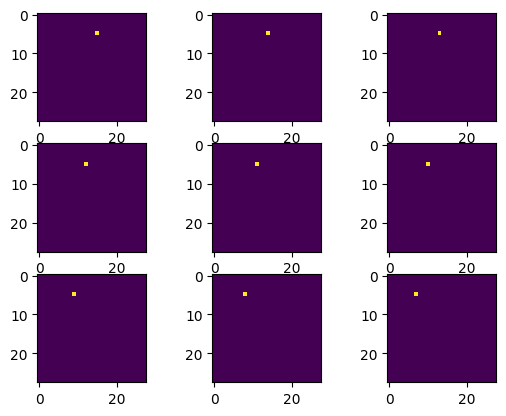

In [58]:
fig, axs = plt.subplots(nrows=num_of_vects_row, ncols=num_of_vects_cols)
for i in range(num_of_vects_row):
    for j in range(num_of_vects_cols):
        axs[i][j].imshow(sEigvects[i*num_of_vects_cols+j].reshape(img_x_size, img_y_size))

plt.show()

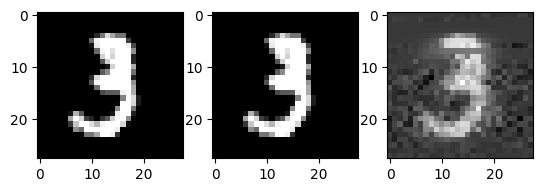

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=3)
orig_img = train_X_3[1]

ctx3_minus_mean = orig_img # - avg_3_img
axs[0].imshow(orig_img, cmap=plt.get_cmap('gray'))
axs[1].imshow(ctx3_minus_mean, cmap=plt.get_cmap('gray'))

# reshape input image to 1x784
reshaped_ctx3_minux_mean = ctx3_minus_mean.reshape(1, img_x_size*img_y_size)

# 1x784 @ 784xn -> 1xn (n values characterizing original image)
ctx3_vectored = reshaped_ctx3_minux_mean @ sEigvects.T

# restoration 1xn @ nx784 -> 1x784
uncompressed = ctx3_vectored @ sEigvects
reshp_to = np.sqrt(uncompressed.shape[1]).astype(int)
restored_img = uncompressed.reshape(reshp_to, reshp_to) + avg_3_img

axs[2].imshow(restored_img.astype(float), cmap=plt.get_cmap('gray'))
plt.show()